In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import signal
import matplotlib.pyplot as plt

### This notebook includes all of the code used to plot the figures seen in the Traffic Monitoring Using Doppler Radar EEE4022S project Theory Section.

# Theory Section Plots

## Spectrogram

### Figure 2.5

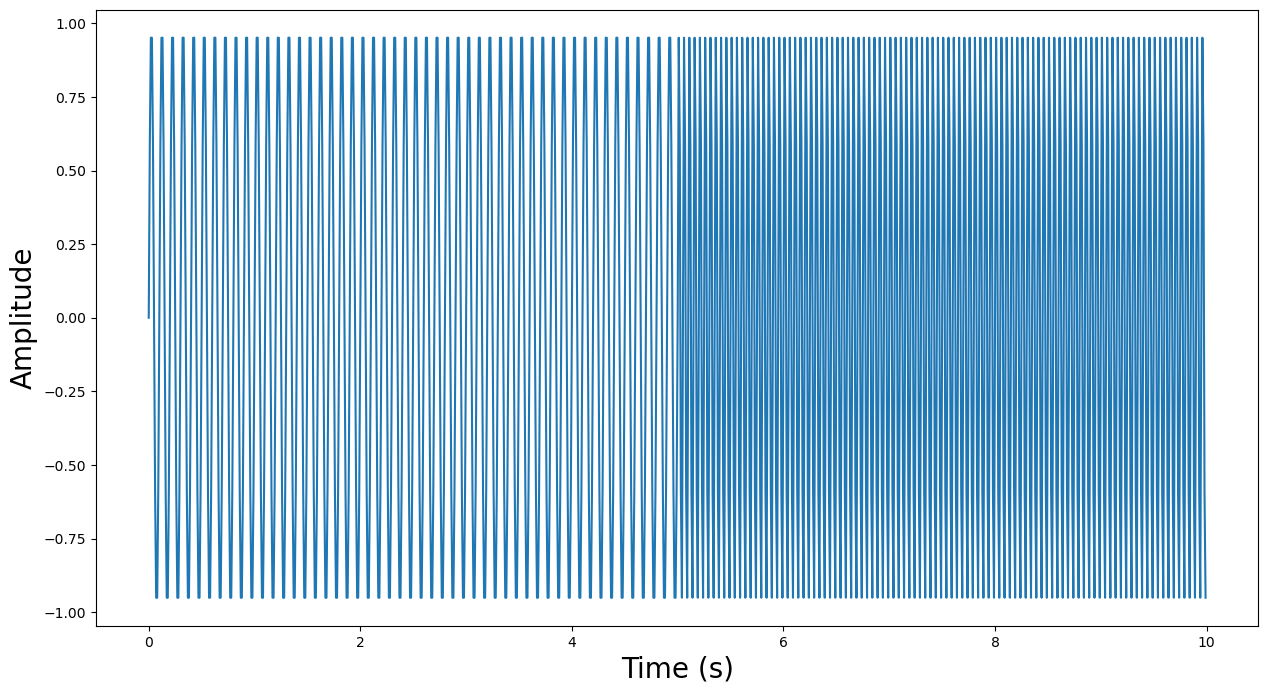

In [38]:
# Define constants
T = 5.0     # seconds
Fs = 100.0 # Sample rate 
N = int(T * Fs) # Total number of samples

F1 = 10.0 # Frequency of signal 1
F2 = 20.0 # Frequency of signal 2

# Create a time array for each segment
t1 = np.linspace(0.0, T, N, endpoint=False)
t2 = np.linspace(T, 2*T, N, endpoint=False)

# Generate sinusoidal signal for each segment
s1 = np.sin(F1 * 2 * np.pi * t1)
s2 = np.sin(F2 * 2 * np.pi * t2)

# Combine the signals and the time arrays
s = np.concatenate([s1, s2])
t = np.concatenate([t1, t2])

plt.figure(figsize=(15,8))
plt.plot(t,s)
plt.ylabel('Amplitude', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.savefig('TimeDomainSpectrogramIllustraition.pdf', format = 'pdf')
plt.show()

### Figure 2.6

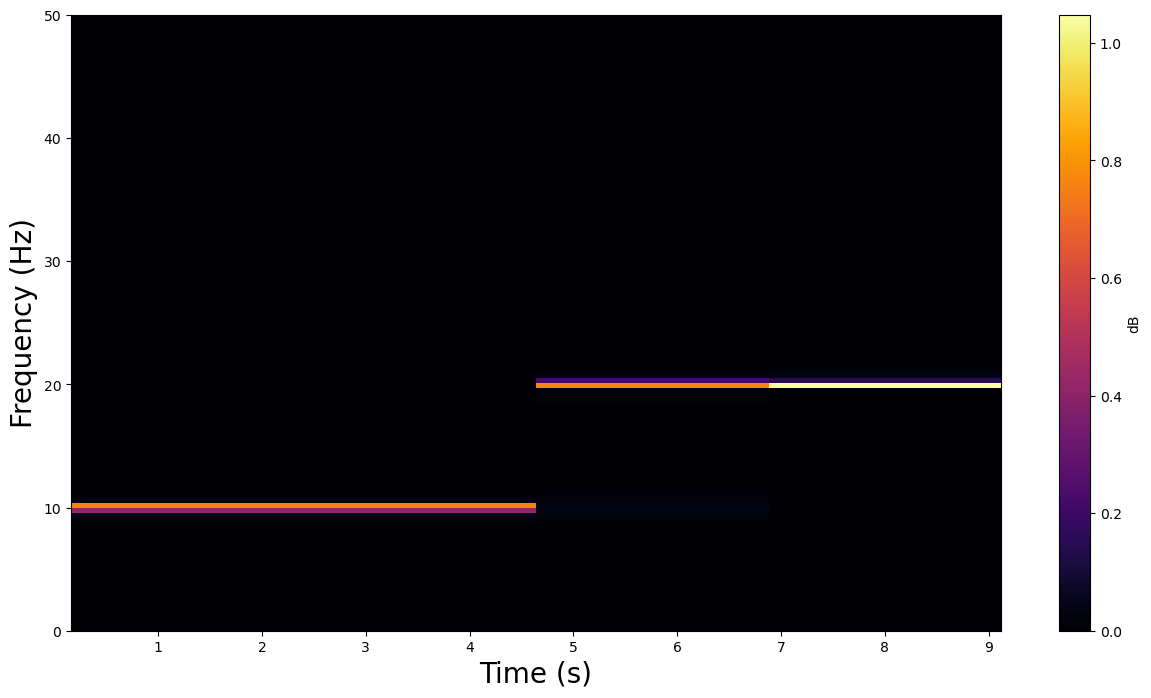

In [39]:

f, t, Sxx = signal.spectrogram(s, Fs)
plt.figure(figsize=(15,8))
plt.pcolormesh(t, f, Sxx, cmap = 'inferno')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('SpectrogramIllustraition.png', format = 'png')
plt.show()

### Figure 2.7

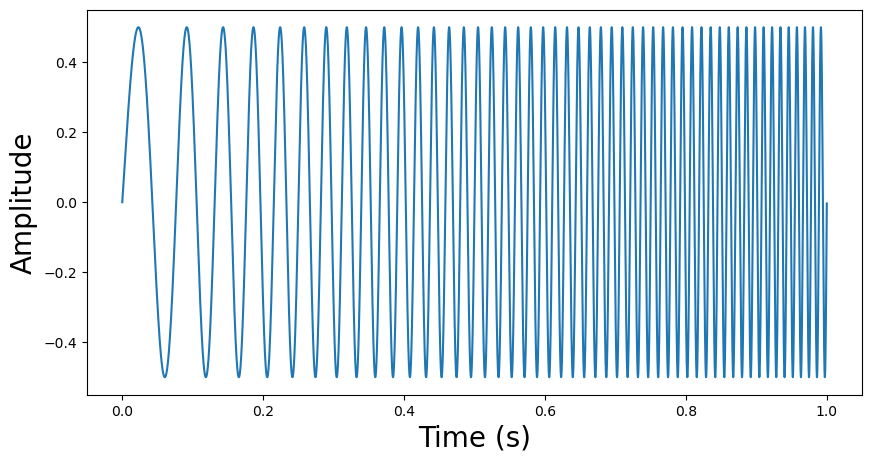

In [40]:
# Constants
sample_rate = 44100  # Sample rate in Hz
duration = 1.0  # Duration of the signal in seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)  # Time values

# Generate a chirp signal
frequency_start = 10  # Start frequency in Hz
frequency_end = 50  # End frequency in Hz
amplitude = 0.5
random_signal = amplitude * np.sin(2 * np.pi * np.linspace(frequency_start, frequency_end, len(t)) * t)

# Plot the chirp signal
plt.figure(figsize=(10, 5))
plt.plot(t, random_signal)
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Amplitude', fontsize = '20')
plt.savefig('SpectrogramMathsFullSignal.png', format = 'png')
plt.show()

### Figure 2.8 (note the red boxes seen in the report were added in a notetaking app (Notability) after plotting)

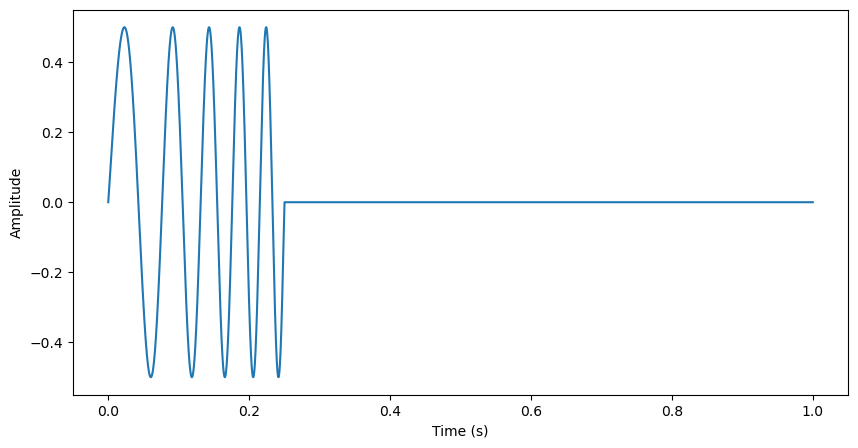

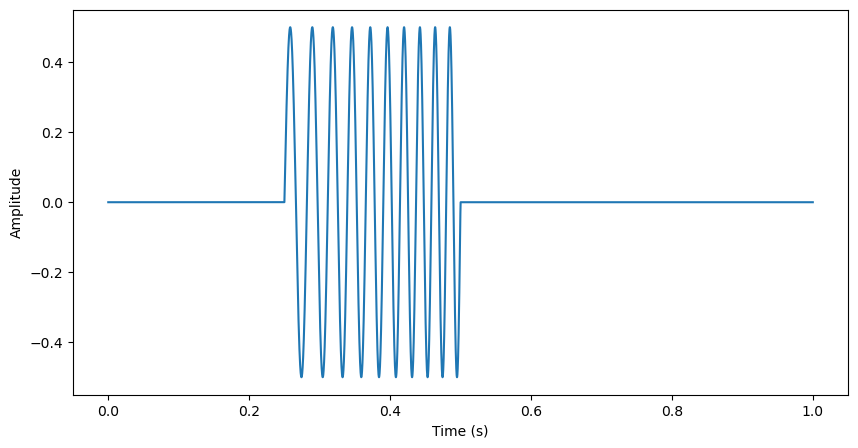

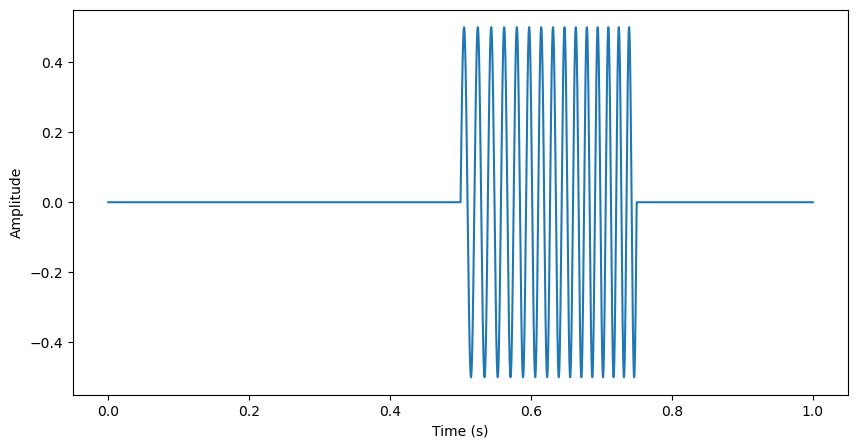

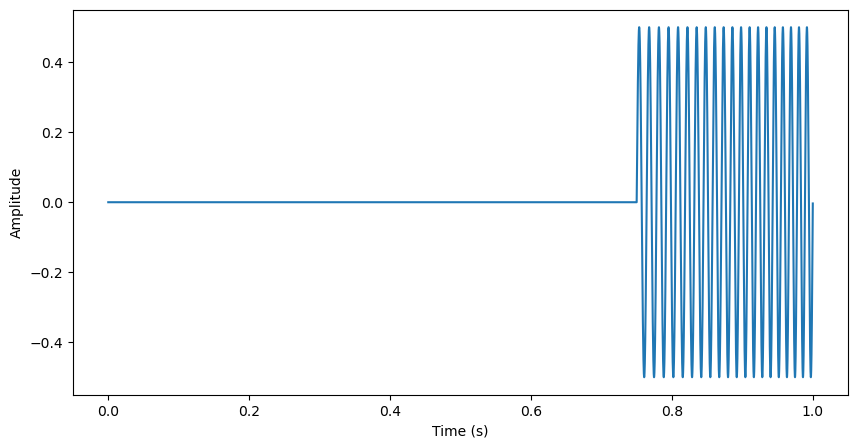

In [41]:
Window1 = np.zeros(len(t))
Window1[0:11025] = 1

# Apply the window to the random signal
windowed_signal = random_signal * Window1

# Plot the random signal
plt.figure(figsize=(10, 5))
plt.plot(t, windowed_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig('SpectrogramMathsW1.png', format = 'png')
plt.show()

Window2 = np.zeros(len(t))
Window2[11025:22050] = 1

# Apply the window to the random signal
windowed_signal = random_signal * Window2

# Plot the random signal
plt.figure(figsize=(10, 5))
plt.plot(t, windowed_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig('SpectrogramMathsW2.png', format = 'png')
plt.show()

Window2 = np.zeros(len(t))
Window2[22050:33075] = 1

# Apply the window to the random signal
windowed_signal = random_signal * Window2

# Plot the random signal
plt.figure(figsize=(10, 5))
plt.plot(t, windowed_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig('SpectrogramMathsW3.png', format = 'png')
plt.show()

Window2 = np.zeros(len(t))
Window2[33075:44100] = 1

# Apply the window to the random signal
windowed_signal = random_signal * Window2

# Plot the random signal
plt.figure(figsize=(10, 5))
plt.plot(t, windowed_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig('SpectrogramMathsW4.png', format = 'png')
plt.show()

## Gaussian Smoothing

### Figure 2.11

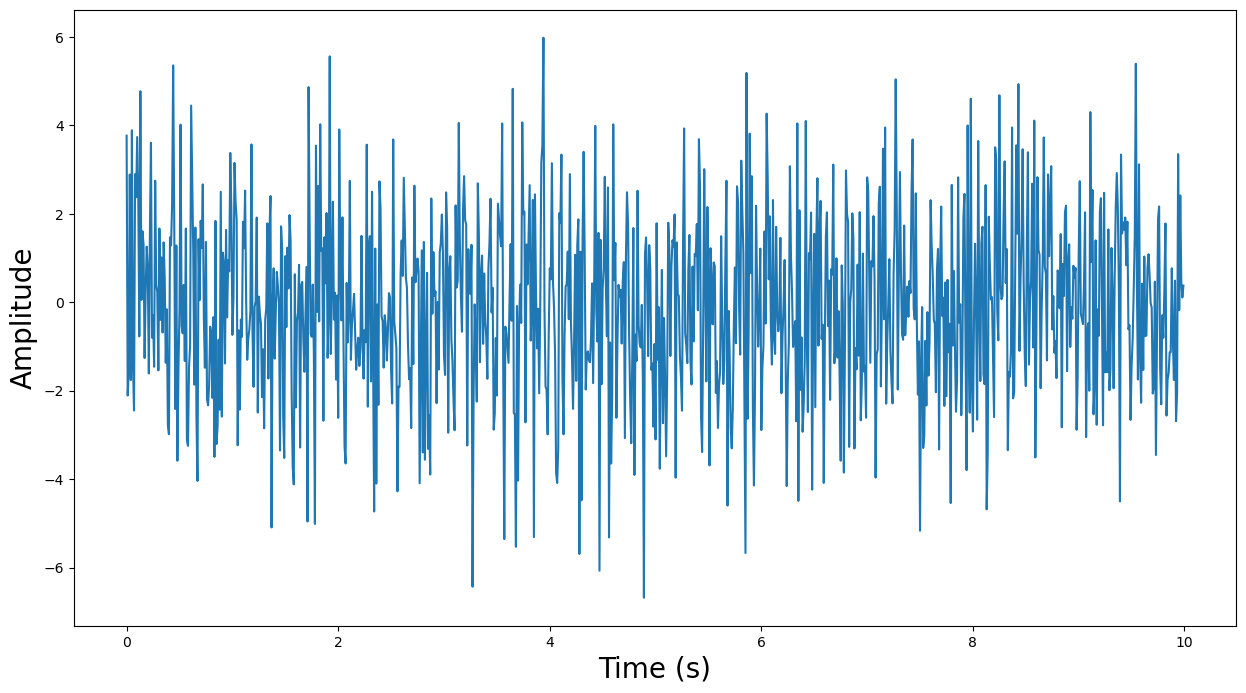

In [42]:
# Define constants
T = 5.0     # seconds
Fs = 100.0  # Sample rate 
N = int(T * Fs)  # Total number of samples

F1 = 10.0  # Frequency of signal 1
F2 = 20.0  # Frequency of signal 2

# Create a time array for each segment
t1 = np.linspace(0.0, T, N, endpoint=False)
t2 = np.linspace(T, 2*T, N, endpoint=False)

# Generate sinusoidal signal for each segment
s1 = np.sin(F1 * 2 * np.pi * t1)
s2 = np.sin(F2 * 2 * np.pi * t2)

# Combine the signals and the time arrays
s = np.concatenate([s1, s2])
t = np.concatenate([t1, t2])

# Generate random noise
noise_level = 2  # Adjust the noise level as needed
noise = noise_level * np.random.normal(0, 1, len(s))

# Add noise to the signal
noisy_signal = s + noise

# Plot the noisy signal
plt.figure(figsize=(15, 8))
plt.plot(t, noisy_signal)
plt.ylabel('Amplitude', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.savefig('NoisyTimeDomainSignal.pdf', format='pdf')
plt.show()

### Figure 2.12

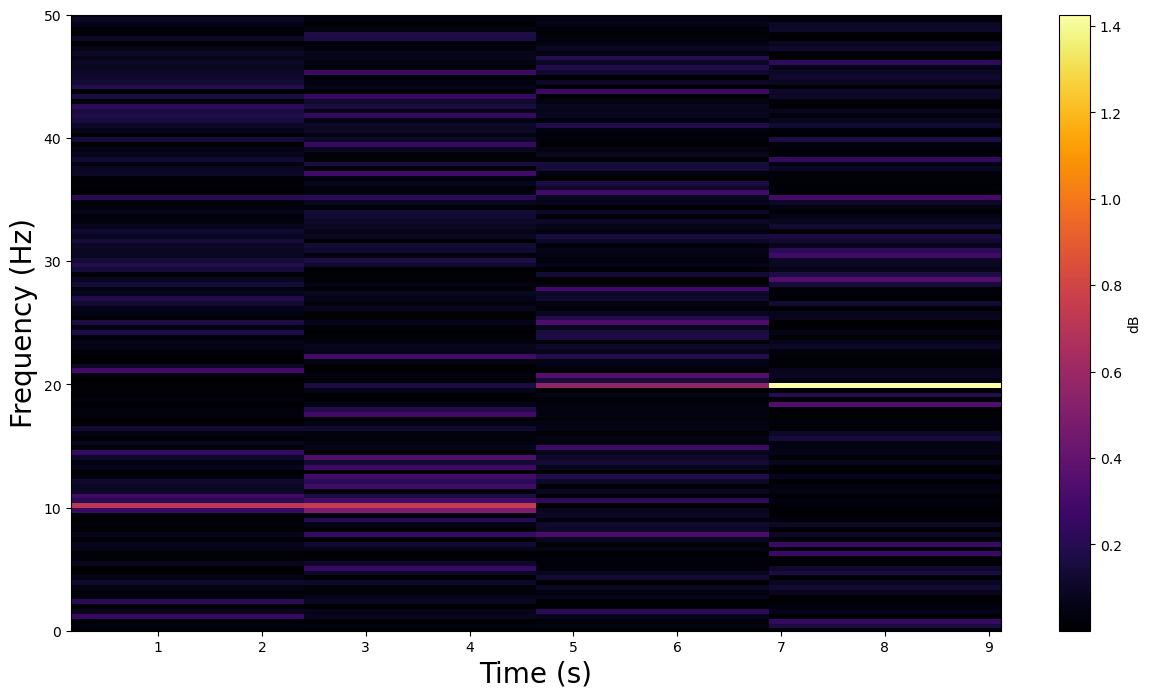

In [43]:
f, t, Sxx = signal.spectrogram(noisy_signal, Fs)
plt.figure(figsize=(15,8))
plt.pcolormesh(t, f, Sxx, cmap = 'inferno')
plt.ylabel('Frequency (Hz)', fontsize='20')
plt.xlabel('Time (s)', fontsize='20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('NoisySpectrogramIllustraition.png', format = 'png')
plt.show()

### Figure 2.13

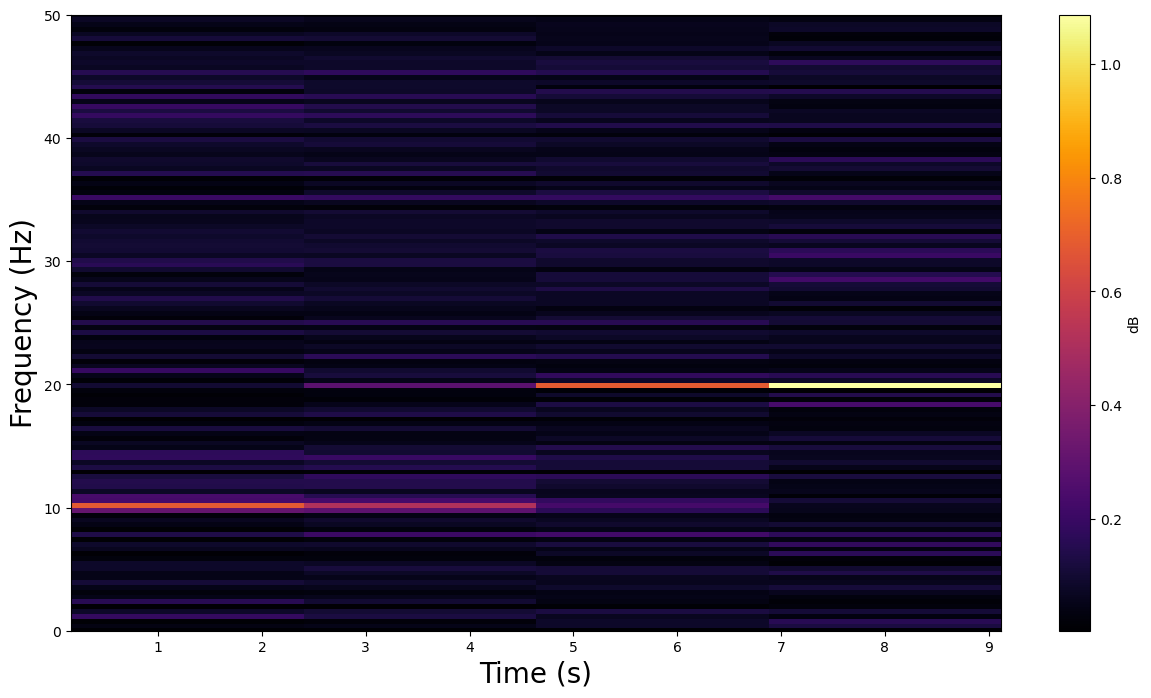

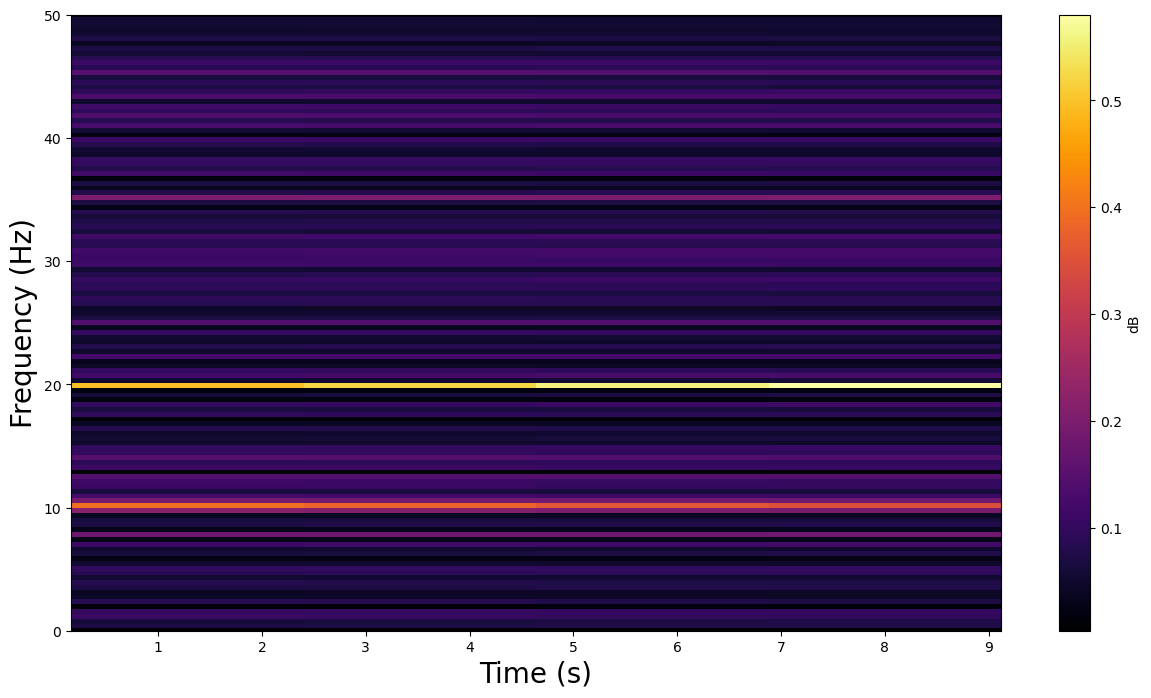

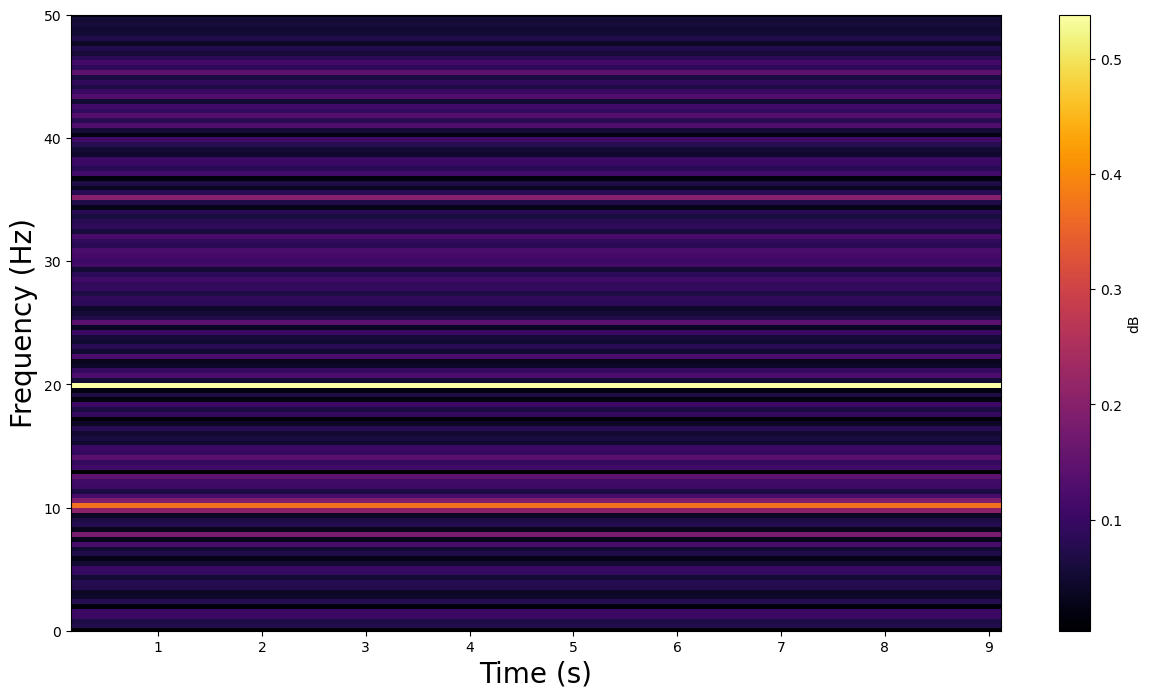

In [44]:
# Apply Gaussian smoothing to the spectrogram
sigma = (0, 1)  # Adjust the sigma values as needed
Sxx_smoothed = gaussian_filter(Sxx, sigma=sigma)

# Plot the smoothed spectrogram
plt.figure(figsize=(15, 8))
plt.pcolormesh(t, f, Sxx_smoothed, cmap='inferno')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('Smoothed(0,1).png', format='png')
plt.show()

# Apply Gaussian smoothing to the spectrogram
sigma = (0, 3)  # Adjust the sigma values as needed
Sxx_smoothed = gaussian_filter(Sxx, sigma=sigma)

# Plot the smoothed spectrogram
plt.figure(figsize=(15, 8))
plt.pcolormesh(t, f, Sxx_smoothed, cmap='inferno')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('Smoothed(0,3).png', format='png')
plt.show()

# Apply Gaussian smoothing to the spectrogram
sigma = (0, 10)  # Adjust the sigma values as needed
Sxx_smoothed = gaussian_filter(Sxx, sigma=sigma)

# Plot the smoothed spectrogram
plt.figure(figsize=(15, 8))
plt.pcolormesh(t, f, Sxx_smoothed, cmap='inferno')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('Smoothed(0,10).png', format='png')
plt.show()





### Figure 2.14

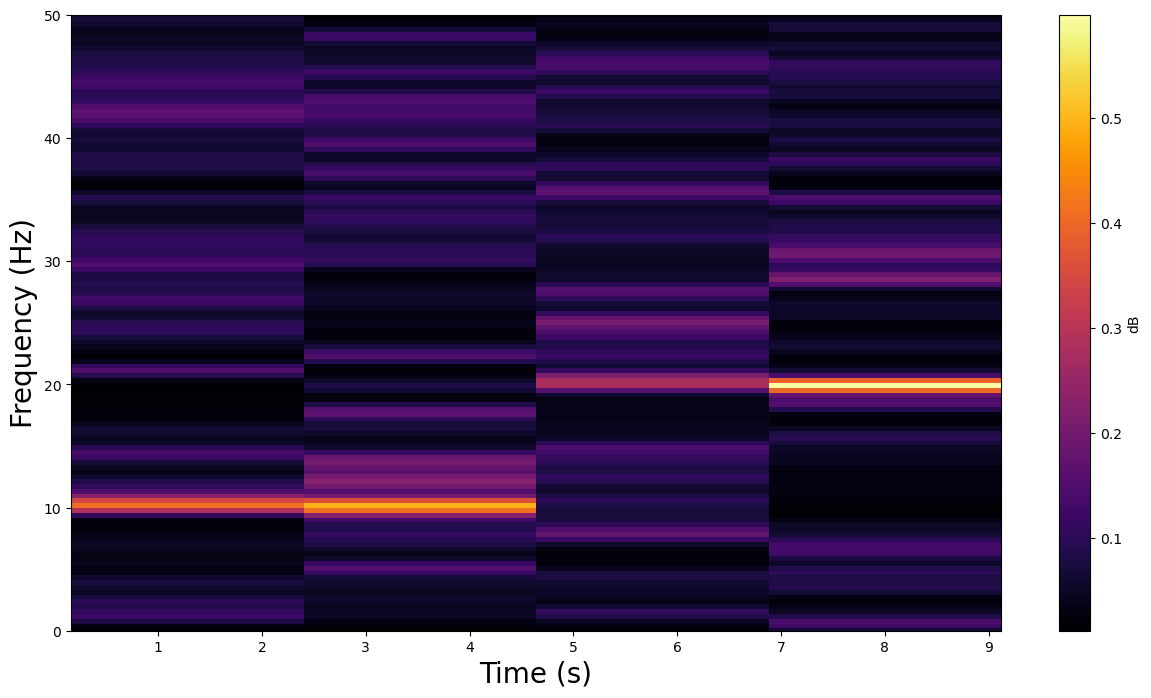

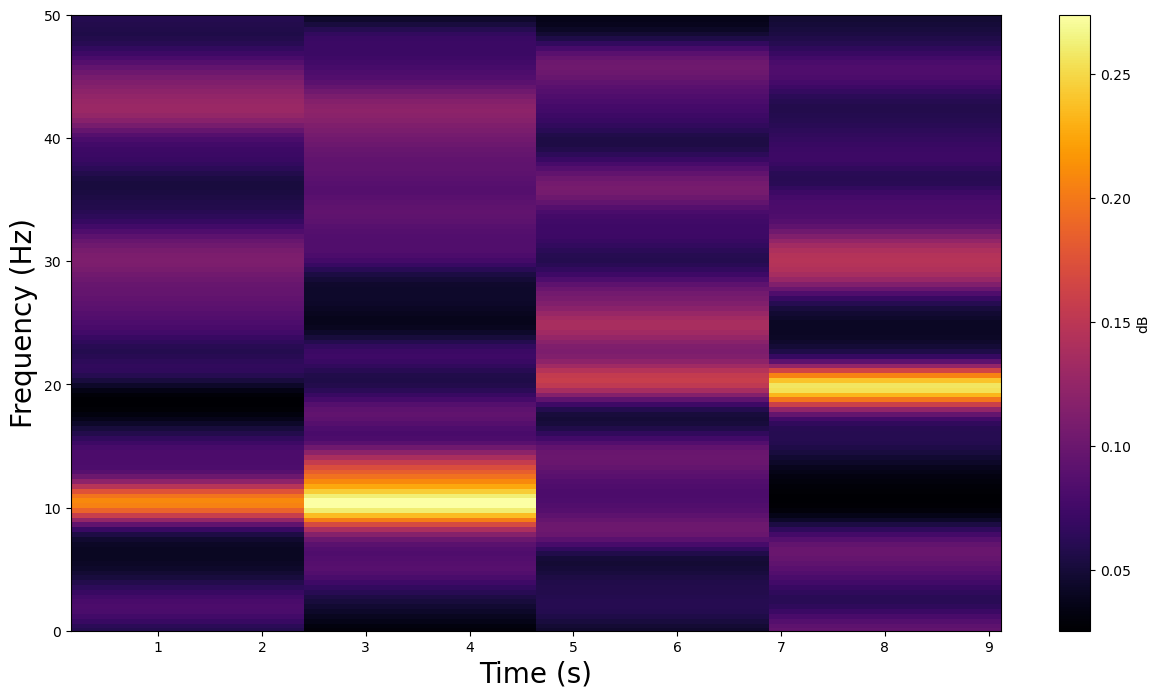

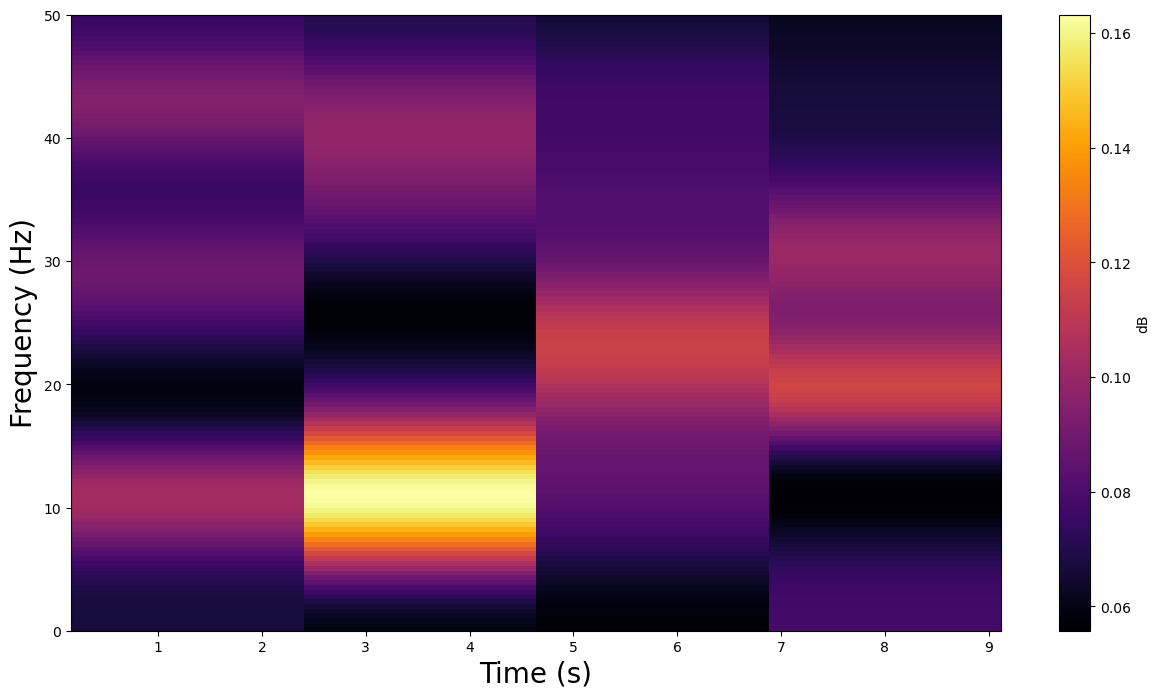

In [45]:
# Apply Gaussian smoothing to the spectrogram
sigma = (1,0)  # Adjust the sigma values as needed
Sxx_smoothed = gaussian_filter(Sxx, sigma=sigma)

# Plot the smoothed spectrogram
plt.figure(figsize=(15, 8))
plt.pcolormesh(t, f, Sxx_smoothed, cmap='inferno')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('Smoothed(1,0).png', format='png')
plt.show()

# Apply Gaussian smoothing to the spectrogram
sigma = (3,0)  # Adjust the sigma values as needed
Sxx_smoothed = gaussian_filter(Sxx, sigma=sigma)

# Plot the smoothed spectrogram
plt.figure(figsize=(15, 8))
plt.pcolormesh(t, f, Sxx_smoothed, cmap='inferno')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('Smoothed(3,0).png', format='png')
plt.show()

# Apply Gaussian smoothing to the spectrogram
sigma = (10,0)  # Adjust the sigma values as needed
Sxx_smoothed = gaussian_filter(Sxx, sigma=sigma)

# Plot the smoothed spectrogram
plt.figure(figsize=(15, 8))
plt.pcolormesh(t, f, Sxx_smoothed, cmap='inferno')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylim([0, 50])
plt.colorbar(label='dB')
plt.savefig('Smoothed(10,0).png', format='png')
plt.show()

## Moving Average Filter

### Figure 2.16

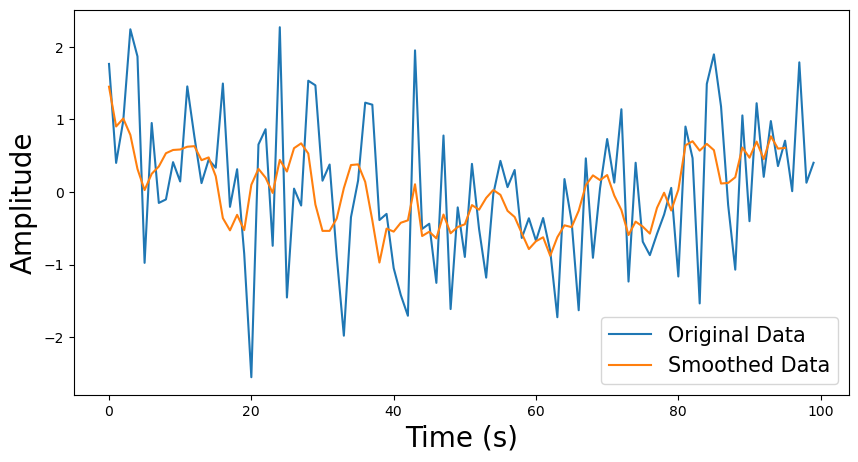

In [46]:
# Generate a noisy 1D dataset
np.random.seed(0)
data = np.random.randn(100)  # Generate 100 random data points

# Define the window size for the moving average filter
window_size = 5

# Apply the moving average filter
smoothed_data = np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Plot the original data and the smoothed data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Original Data', linestyle='-')
plt.plot(smoothed_data, label='Smoothed Data', linestyle='-')
plt.legend(fontsize = '15')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Amplitude', fontsize = '20')
plt.savefig('MovingAverageImplementation.pdf',format = 'pdf')
plt.show()


### Figure 2.17

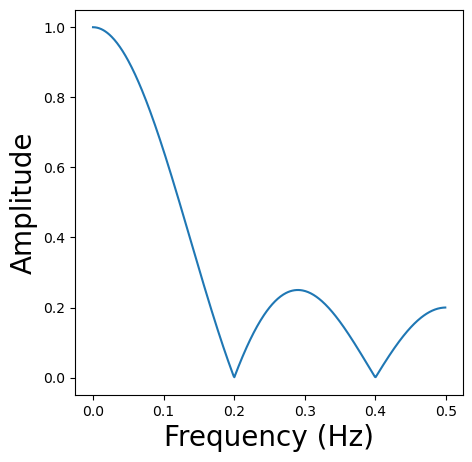

In [47]:
# Define the window size for the moving average filter
window_size = 5

# Frequency response of the moving average filter
filter_response = np.abs(np.fft.fft(np.ones(window_size) / window_size, n=1024))
frequency = np.fft.fftfreq(len(filter_response))

# Only consider the positive frequency components
positive_frequency = frequency[:len(frequency) // 2]
filter_response = filter_response[:len(filter_response) // 2]

# Plot the frequency domain response of the filter
plt.figure(figsize=(5, 5))
plt.plot(positive_frequency, filter_response, label='Frequency Response')
plt.xlabel('Frequency (Hz)', fontsize = '20')
plt.ylabel('Amplitude', fontsize = '20')
#plt.ylim(0, 1.2)
plt.savefig('MovingAverageFilterFrequencySpectrum.pdf',format='pdf')
plt.show()